## Rover Lab - Perpective Transform Notebook
This notebook helps you to acquire the source points of your perspective transform. Click `Run` button above to execute the code in each block!

_Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output"._

In [76]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window (note it may show up behind your browser)
# Make some of the relevant imports
import cv2 # OpenCV for perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder

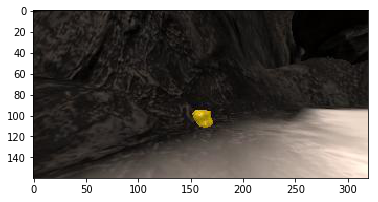

In [82]:
path = '../test_dataset/IMG/*'
img_list = glob.glob(path)

example_grid = '../calibration_images/example_grid1.jpg'
example_rock = '../calibration_images/example_rock2.jpg'
grid_img = mpimg.imread(example_grid)
rock_img = mpimg.imread(example_rock)

plt.imshow(rock_img)
plt.show() 

In [83]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
def rock_thresh(img):
    HSV_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (20 < HSV_img[:,:,0]) \
                & (30 > HSV_img[:,:,0]) \
                & (80 < HSV_img[:,:,1]) \
                & (255 > HSV_img[:,:,1]) \
                & (80 < HSV_img[:,:,2]) \
                & (255 > HSV_img[:,:,2]) 
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


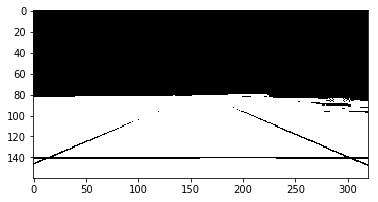

In [100]:
b_img = color_thresh(grid_img)
plt.imshow(b_img, cmap='gray')
plt.show()

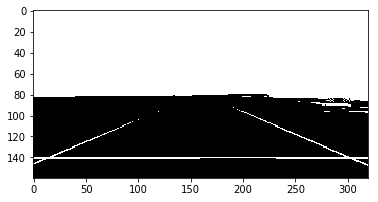

In [101]:
a_img = cv2.bitwise_not(b_img)
plt.imshow(a_img, cmap='gray')
plt.show()